In [1]:
%matplotlib inline
from pycalphad import equilibrium
from pycalphad import Database, Model
import pycalphad.variables as v

In [2]:
db_alfe = Database('alfe_sei.TDB')
my_phases_alfe = ['LIQUID', 'HCP_A3', 'AL5FE2', 'AL2FE', 'AL5FE4', 'FCC_A1', 'B2_BCC', 'AL13FE4']

In [3]:
%time eq= equilibrium(db_alfe, ['AL', 'FE', 'VA'], my_phases_alfe, {v.X('AL'): (1e-5,1,0.1), v.T: 300, v.P: [101325]}, verbose=False)
print(eq)

CPU times: user 55.3 s, sys: 17.7 s, total: 1min 12s
Wall time: 55.7 s
<xarray.Dataset>
Dimensions:       (P: 1, T: 1, X_AL: 10, component: 2, internal_dof: 5, vertex: 2)
Coordinates:
  * P             (P) float64 1.013e+05
  * T             (T) float64 300.0
  * X_AL          (X_AL) float64 1e-05 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9
  * vertex        (vertex) int64 0 1
  * component     (component) object 'AL' 'FE'
  * internal_dof  (internal_dof) int64 0 1 2 3 4
Data variables:
    MU            (P, T, X_AL, component) float64 -1.339e+05 -8.185e+03 ...
    NP            (P, T, X_AL, vertex) float64 1.0 nan 1.0 nan 1.0 nan 1.0 ...
    GM            (P, T, X_AL) float64 -8.186e+03 -1.777e+04 -2.542e+04 ...
    X             (P, T, X_AL, vertex, component) float64 1e-05 1.0 nan nan ...
    Y             (P, T, X_AL, vertex, internal_dof) float64 1e-05 1.0 1e-05 ...
    Phase         (P, T, X_AL, vertex) object 'B2_BCC' '' 'B2_BCC' '' ...
Attributes:
    solve_iterations: 20
    hull_iter

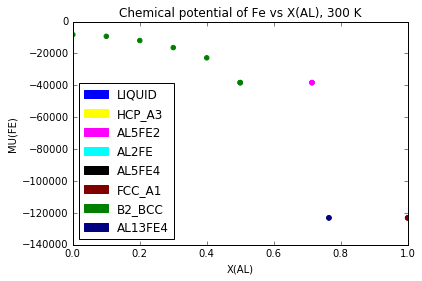

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad.plot.utils import phase_legend
plt.gca().set_xlim((0,1))
temp = 300
plt.gca().set_title('Chemical potential of Fe vs X(AL), {} K'.format(temp))
plt.gca().set_xlabel('X(AL)')
plt.gca().set_ylabel('MU(FE)')

phase_handles, phasemap = phase_legend(my_phases_alfe)
phasecolors = [phasemap[str(p)] for p in eq.Phase.sel(T=temp, vertex=0).values[0] if p != '']
plt.scatter(eq.X.sel(T=temp, component='AL', vertex=0), eq.MU.sel(T=temp, component='FE'), color=phasecolors)
phasecolors = [phasemap[str(p)] for p in eq.Phase.sel(T=temp, vertex=1).values[0] if p != '']
plt.scatter(eq.X.sel(T=temp, component='AL', vertex=1), eq.MU.sel(T=temp, component='FE'), color=phasecolors)
plt.gca().legend(phase_handles, my_phases_alfe, loc='lower left')